In [1]:
import pandas as pd
import numpy as np
import rule
import matplotlib.pyplot as plt

In [2]:
dirty_iris  = pd.read_csv('iris_dirty.csv')
dirty_iris['species'] = dirty_iris['species'].str.lower()
complete_observations = dirty_iris.dropna()
complete_percentage = len(complete_observations) / len(dirty_iris) * 100

print("Number of complete observations:", len(complete_observations))
print("Percentage of complete observations:", complete_percentage)


Number of complete observations: 131
Percentage of complete observations: 87.33333333333333


In [3]:
dirty_iris.replace(['?', 'NA'], np.nan, inplace=True)
dirty_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
with open('rules.txt', 'r') as file:
    rules_text = file.read()

# Print the rules
print("Rules:")
print(rules_text)

violation_counts = rule.count_violations(dirty_iris)

# Print violation counts
print("Violation counts:")
print(violation_counts)

Rules:
Species should be one of the following values: setosa, versicolor or virginica.
All measured numerical properties of an iris should be positive.
The petal length of an iris is at least 2 times its petal width.
The sepal length of an iris cannot exceed 30 cm.
The sepals of an iris are longer than its petals.
Violation counts:
{'Rule 1': 0, 'Rule 2': 0, 'Rule 3': 0, 'Rule 4': 0, 'Rule 5': 0}


        Count
Rule 1      0
Rule 2      0
Rule 3      0
Rule 4      0
Rule 5      0


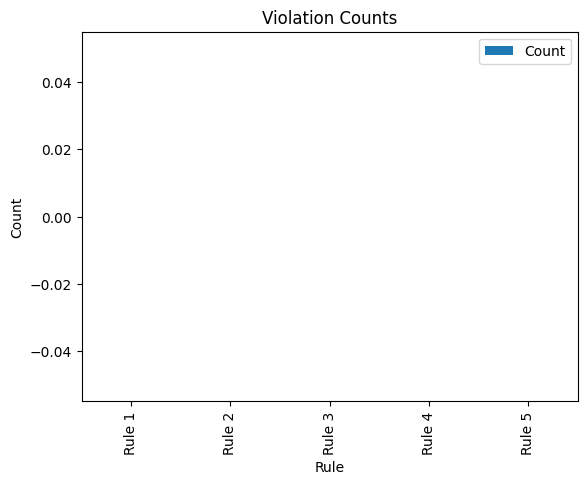

In [9]:
violations_df = pd.DataFrame.from_dict(violation_counts, orient='index', columns=['Count'])
print(violations_df)
# Plot the result
violations_df.plot(kind='bar')
plt.title('Violation Counts')
plt.xlabel('Rule')
plt.ylabel('Count')
plt.show()


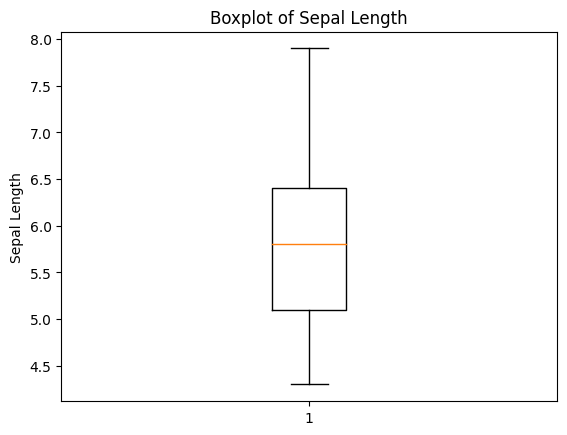

Outliers in Sepal Length: []


In [6]:
# Using boxplot.stats() to find outliers
outliers = plt.boxplot(dirty_iris['sepal_length'].dropna()).get('fliers')[0].get_data()[1]
plt.title('Boxplot of Sepal Length')
plt.ylabel('Sepal Length')
plt.show()
print("Outliers in Sepal Length:", outliers)